<b>Importing necessary library.</b>

In [1]:
import pandas as pd 
import numpy as np 
from scipy import stats

%matplotlib inline 
import matplotlib.pyplot as plt 
import seaborn as sns

<b>Load the dataset and find all the possible insight.</b>

In [2]:
df=pd.read_csv("Data/case_study_data_01/data_correlation.csv")
df.head()

,Timestamp,email,age_group,gender,living_area,social_media,purchase_frequency,preferred_platform,price,cost_of_service,ease_of_service,advertisement,peer_recommendation,customer_review,product_variation,trust,offers,trend,influencer,brand_value
0,7/16/2022 21:01:25,mohiuddinipe17@gmail.com,24 - 28,Male,City,"Facebook, Instagram, Messenger, What's app, Li...",Occasionally,Facebook page,8,3,8,6,7,10,8,9,9,5,5,8
1,7/16/2022 21:06:33,rifatah6@gmail.com,24 - 28,Male,Megalopolis,Facebook,Twice to thrice per month,Facebook page,5,1,2,4,10,7,5,10,5,1,1,8
2,7/16/2022 21:10:54,mail2ether.saleh040@gmail.com,18 - 23,Male,Metropolis,"Facebook, Instagram, Messenger, What's app, Li...",Occasionally,Facebook page,5,6,6,5,5,5,6,6,5,5,6,6
3,7/16/2022 21:11:48,idrakalrakin@gmail.com,18 - 23,Male,Metropolis,"Facebook, Instagram, Messenger",Occasionally,E-commerce website,8,8,9,8,9,8,8,8,8,8,8,8
4,7/16/2022 21:13:41,nadeemmahmudnayan066@gmail.com,18 - 23,Male,Town,"Facebook, Instagram, Messenger, What's app, Yo...",Occasionally,E-commerce website,10,10,10,7,9,10,10,10,10,10,8,9


In [3]:
#extract & standardize values of all the factors 
df_population=df.iloc[:,8:]
df_population=(df_population-df_population.mean())/df_population.std()
df_population.describe()

,price,cost_of_service,ease_of_service,advertisement,peer_recommendation,customer_review,product_variation,trust,offers,trend,influencer,brand_value
count,8.300000e+01,8.300000e+01,8.300000e+01,8.300000e+01,8.300000e+01,8.300000e+01,8.300000e+01,8.300000e+01,8.300000e+01,8.300000e+01,8.300000e+01,8.300000e+01
mean,-5.885520e-17,-6.955614e-17,4.547902e-17,-9.279726e-17,-6.286805e-17,-1.050030e-16,2.300703e-16,4.280378e-16,-1.571701e-16,4.213497e-17,-1.631894e-16,-1.243985e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.917444e+00,-2.364899e+00,-3.467945e+00,-2.486419e+00,-2.929794e+00,-3.426453e+00,-3.117621e+00,-3.641213e+00,-3.214093e+00,-2.797374e+00,-1.754373e+00,-3.392493e+00
25%,-5.980201e-01,-6.691184e-01,-3.673407e-01,-5.843658e-01,-5.780250e-01,-3.012267e-01,-5.955690e-01,-1.787830e-01,-6.973975e-01,-8.129120e-01,-9.270264e-01,-7.310855e-01
50%,3.297494e-01,1.787721e-01,1.494267e-01,-1.088525e-01,3.626824e-01,2.196444e-01,4.132519e-01,3.158499e-01,3.092806e-01,1.793188e-01,3.139928e-01,3.334776e-01
75%,7.936342e-01,6.027174e-01,6.661942e-01,6.044176e-01,8.330361e-01,7.405155e-01,9.176624e-01,8.104829e-01,8.126197e-01,6.754342e-01,7.276659e-01,8.657591e-01
max,1.257519e+00,1.450608e+00,1.182962e+00,1.793201e+00,1.303390e+00,1.261387e+00,1.422073e+00,8.104829e-01,1.315959e+00,1.667665e+00,1.968685e+00,1.398041e+00


In [4]:
#create a sample from the study population
df_sample=df_population.iloc[30:60,:]
df_sample.head()

,price,cost_of_service,ease_of_service,advertisement,peer_recommendation,customer_review,product_variation,trust,offers,trend,influencer,brand_value
30,-0.134135,-0.669118,-0.367341,-0.108852,0.833036,-0.301227,-1.099979,-0.178783,-0.194058,-0.316797,-0.099680,0.333478
31,0.329749,0.602717,0.666194,-0.584366,0.362682,0.219644,0.917662,0.315850,1.315959,0.179319,-1.754373,-1.263367
32,0.793634,-1.093064,0.666194,0.842174,1.303390,0.219644,-0.091159,0.315850,1.315959,0.675434,-0.513353,0.333478
33,0.329749,-2.364899,0.149427,-1.059879,-0.578025,-0.301227,-1.099979,0.315850,-0.194058,-0.316797,-0.513353,-0.731085
34,-0.598020,-1.093064,1.182962,0.366661,1.303390,-1.342969,1.422073,0.810483,0.309281,0.179319,1.968685,0.333478


In [5]:
#finding ks statistics and p-value then append them in two list 
factors = list(df_population.columns)
statistic = []
pvalue = []

for i in range(0,12):
    ks = stats.ks_2samp(df_population.iloc[:,i], df_sample.iloc[:,i])
    s = ks.statistic
    p = ks.pvalue
    statistic.append(float('%.3f' % (s)))
    pvalue.append(float('%.3f' % (p)))

In [6]:
#make a dataframe and make it png 

ks=pd.DataFrame()
ks['Factors'] = factors
ks['Statistics'] = statistic
ks['P-Value'] = pvalue

ks = ks.style.hide_index()
#dfi.export(ks.style.hide_index(),'ks.png')
ks

C:\Users\Rahad\AppData\Local\Temp\ipykernel_8412\3314754250.py:8: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  ks = ks.style.hide_index()


Factors,Statistics,P-Value
price,0.117000,0.881000
cost_of_service,0.038000,1.000000
ease_of_service,0.183000,0.397000
advertisement,0.060000,1.000000
peer_recommendation,0.058000,1.000000
customer_review,0.098000,0.967000
product_variation,0.104000,0.945000
trust,0.129000,0.801000
offers,0.096000,0.971000
trend,0.066000,1.000000


In [7]:
#adding a label column in population dataframe to differ study population and sample
label=[]
for i in range(0,30):
    label.append('Population')
for i in range(30,60):
    label.append('Sample')
for i in range(60,83):
    label.append('Population')
    
df_population['Label']=label

Text(0.5, 1.0, 'KS Score: Statistic:0.047, P-Value:1.000')

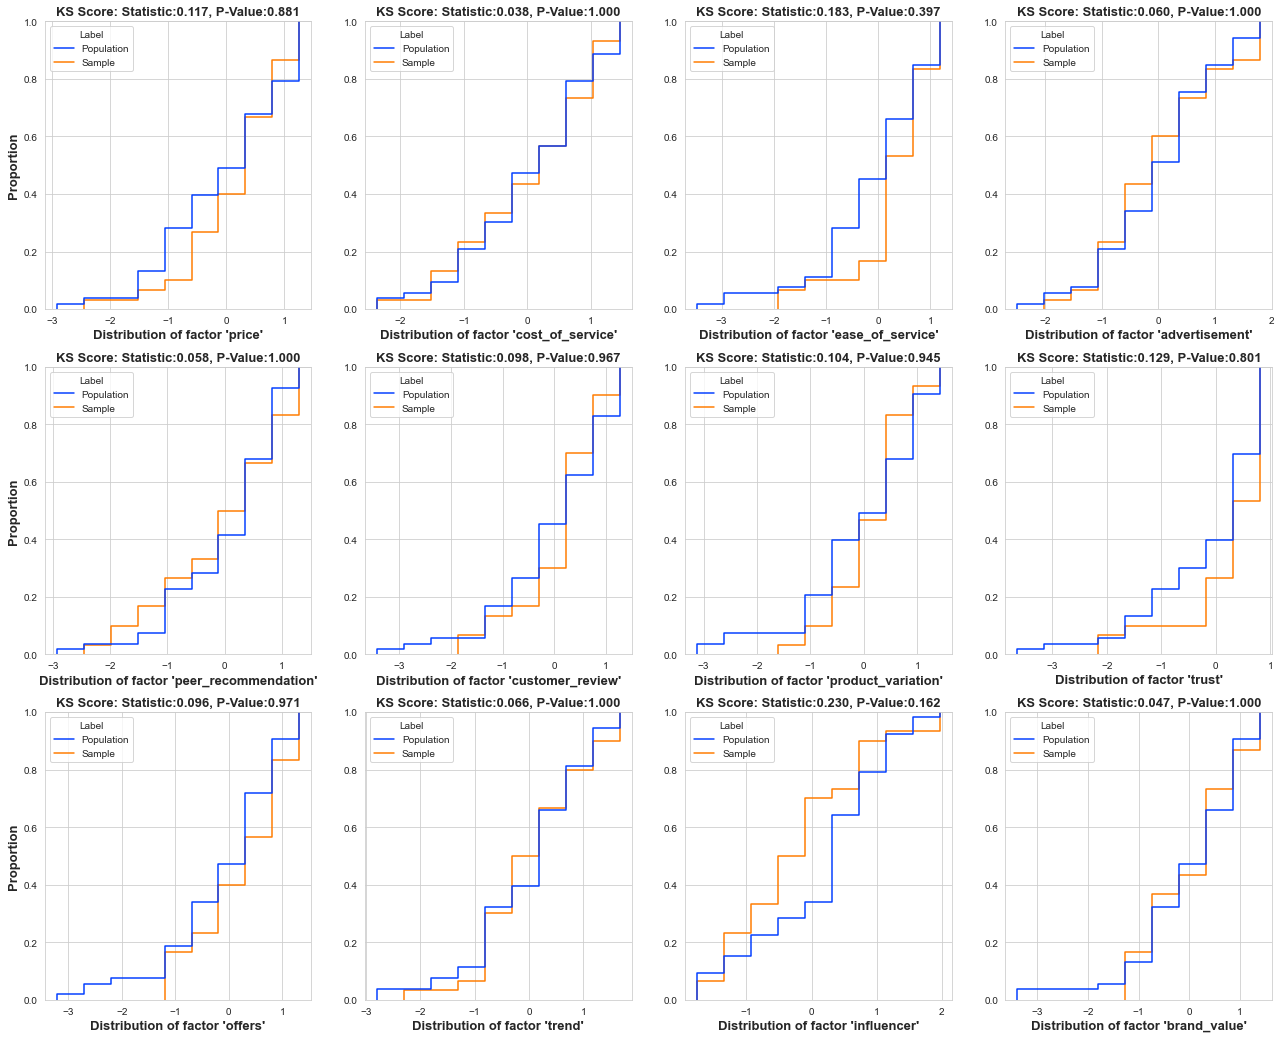

In [8]:
sns.set_style("whitegrid")

fig,axes = plt.subplots(3,4, figsize=(22,18))

sns.ecdfplot(ax=axes[0,0],data=df_population, x='price', hue='Label', palette='bright')
axes[0,0].set_ylabel('Proportion', fontsize=13, fontweight='bold')
axes[0,0].set_xlabel("Distribution of factor 'price'", fontsize=13, fontweight='bold')
axes[0,0].set_title("KS Score: Statistic:0.117, P-Value:0.881", fontsize=13, fontweight='bold')

sns.ecdfplot(ax=axes[0,1],data=df_population, x='cost_of_service', hue='Label', palette='bright')
axes[0,1].set_ylabel('Proportion', fontsize=13, fontweight='bold').set_visible(False)
axes[0,1].set_xlabel("Distribution of factor 'cost_of_service'", fontsize=13, fontweight='bold')
axes[0,1].set_title("KS Score: Statistic:0.038, P-Value:1.000", fontsize=13, fontweight='bold')

sns.ecdfplot(ax=axes[0,2],data=df_population, x='ease_of_service', hue='Label', palette='bright')
axes[0,2].set_ylabel('Proportion', fontsize=13, fontweight='bold').set_visible(False)
axes[0,2].set_xlabel("Distribution of factor 'ease_of_service'", fontsize=13, fontweight='bold')
axes[0,2].set_title("KS Score: Statistic:0.183, P-Value:0.397", fontsize=13, fontweight='bold')

sns.ecdfplot(ax=axes[0,3], x=df_population.iloc[:,3], hue=df_population.iloc[:,12], palette='bright')
axes[0,3].set_ylabel('Proportion', fontsize=13, fontweight='bold').set_visible(False)
axes[0,3].set_xlabel("Distribution of factor 'advertisement'", fontsize=13, fontweight='bold')
axes[0,3].set_title("KS Score: Statistic:0.060, P-Value:1.000", fontsize=13, fontweight='bold')

sns.ecdfplot(ax=axes[1,0],data=df_population, x='peer_recommendation', hue='Label', palette='bright')
axes[1,0].set_ylabel('Proportion', fontsize=13, fontweight='bold')
axes[1,0].set_xlabel("Distribution of factor 'peer_recommendation'", fontsize=13, fontweight='bold')
axes[1,0].set_title("KS Score: Statistic:0.058, P-Value:1.000", fontsize=13, fontweight='bold')

sns.ecdfplot(ax=axes[1,1],x=df_population.iloc[:,5], hue=df_population.iloc[:,12], palette='bright')
axes[1,1].set_ylabel('Proportion', fontsize=13, fontweight='bold').set_visible(False)
axes[1,1].set_xlabel("Distribution of factor 'customer_review'", fontsize=13, fontweight='bold')
axes[1,1].set_title("KS Score: Statistic:0.098, P-Value:0.967", fontsize=13, fontweight='bold')

sns.ecdfplot(ax=axes[1,2],data=df_population, x='product_variation', hue='Label', palette='bright')
axes[1,2].set_ylabel('Proportion', fontsize=13, fontweight='bold').set_visible(False)
axes[1,2].set_xlabel("Distribution of factor 'product_variation'", fontsize=13, fontweight='bold')
axes[1,2].set_title("KS Score: Statistic:0.104, P-Value:0.945", fontsize=13, fontweight='bold')

sns.ecdfplot(ax=axes[1,3],data=df_population, x='trust', hue='Label', palette='bright')
axes[1,3].set_ylabel('Proportion', fontsize=13, fontweight='bold').set_visible(False)
axes[1,3].set_xlabel("Distribution of factor 'trust'", fontsize=13, fontweight='bold')
axes[1,3].set_title("KS Score: Statistic:0.129, P-Value:0.801", fontsize=13, fontweight='bold')

sns.ecdfplot(ax=axes[2,0],data=df_population, x='offers', hue='Label', palette='bright')
axes[2,0].set_ylabel('Proportion', fontsize=13, fontweight='bold')
axes[2,0].set_xlabel("Distribution of factor 'offers'", fontsize=13, fontweight='bold')
axes[2,0].set_title("KS Score: Statistic:0.096, P-Value:0.971", fontsize=13, fontweight='bold')

sns.ecdfplot(ax=axes[2,1],data=df_population, x='trend', hue='Label', palette='bright')
axes[2,1].set_ylabel('Proportion', fontsize=13, fontweight='bold').set_visible(False)
axes[2,1].set_xlabel("Distribution of factor 'trend'", fontsize=13, fontweight='bold')
axes[2,1].set_title("KS Score: Statistic:0.066, P-Value:1.000", fontsize=13, fontweight='bold')

sns.ecdfplot(ax=axes[2,2],data=df_population, x='influencer', hue='Label', palette='bright')
axes[2,2].set_ylabel('Proportion', fontsize=13, fontweight='bold').set_visible(False)
axes[2,2].set_xlabel("Distribution of factor 'influencer'", fontsize=13, fontweight='bold')
axes[2,2].set_title("KS Score: Statistic:0.230, P-Value:0.162",fontsize=13, fontweight='bold')

sns.ecdfplot(ax=axes[2,3],data=df_population, x='brand_value', hue='Label', palette='bright')
axes[2,3].set_ylabel('Proportion', fontsize=13, fontweight='bold').set_visible(False)
axes[2,3].set_xlabel("Distribution of factor 'brand_value'", fontsize=13, fontweight='bold')
axes[2,3].set_title("KS Score: Statistic:0.047, P-Value:1.000", fontsize=13, fontweight='bold')

#fig.savefig("KS factors.png", dpi=300)

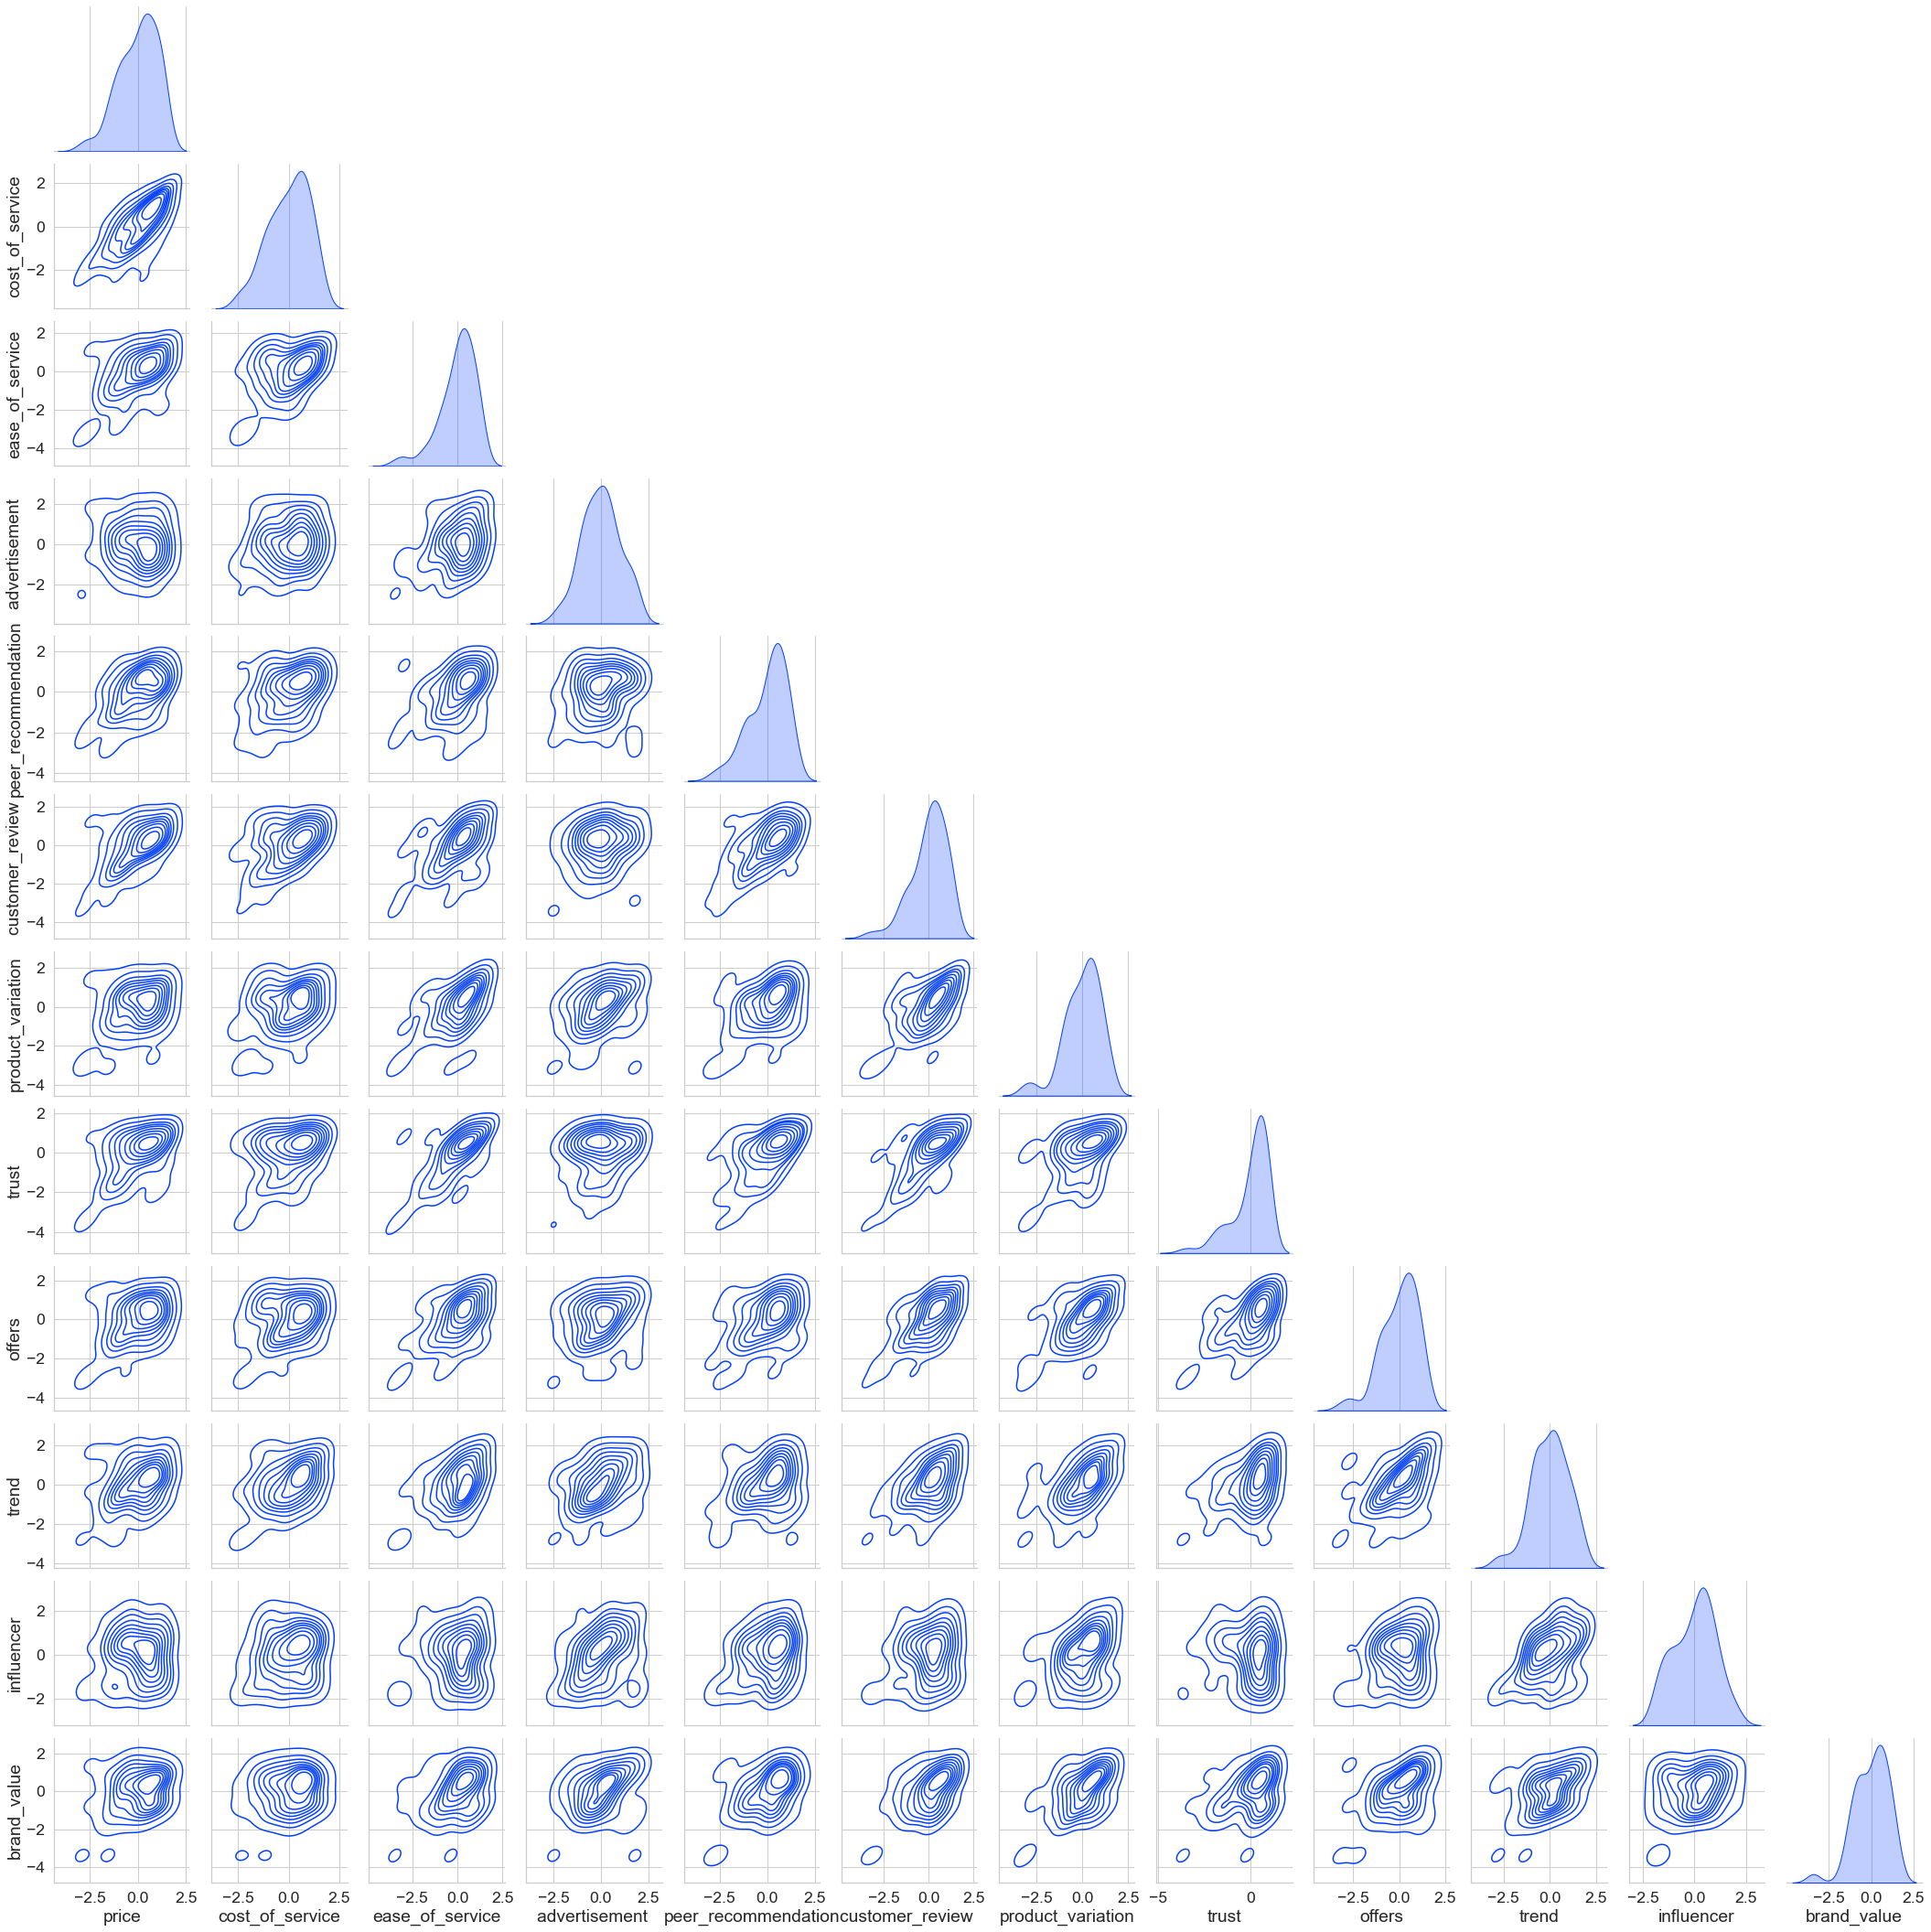

In [10]:
#plot all the factors against each other to understand linearity
sns.set_theme(style="whitegrid", palette='bright', font_scale=1.6)
sns.pairplot(df_population,palette='bright',kind='kde',corner=True)
#plt.savefig("distribution_factors.png", dpi=300)

In [11]:
#finding the pearson correlation co-efficient 
df_population.corr(method='pearson')

,price,cost_of_service,ease_of_service,advertisement,peer_recommendation,customer_review,product_variation,trust,offers,trend,influencer,brand_value
price,1.000000,0.698198,0.488035,0.012121,0.522874,0.563163,0.310071,0.487798,0.372296,0.349911,0.066033,0.289183
cost_of_service,0.698198,1.000000,0.419138,0.172120,0.376952,0.447676,0.272063,0.331553,0.261515,0.395898,0.159193,0.170819
ease_of_service,0.488035,0.419138,1.000000,0.349098,0.422379,0.541226,0.557365,0.715941,0.549570,0.460618,0.075037,0.388996
advertisement,0.012121,0.172120,0.349098,1.000000,0.159973,0.199390,0.343887,0.229848,0.261746,0.373622,0.310465,0.280589
peer_recommendation,0.522874,0.376952,0.422379,0.159973,1.000000,0.600569,0.429848,0.576333,0.417699,0.289887,0.285741,0.436310
customer_review,0.563163,0.447676,0.541226,0.199390,0.600569,1.000000,0.596997,0.686990,0.625044,0.505320,0.198216,0.514171
product_variation,0.310071,0.272063,0.557365,0.343887,0.429848,0.596997,1.000000,0.470329,0.561086,0.553659,0.347053,0.541553
trust,0.487798,0.331553,0.715941,0.229848,0.576333,0.686990,0.470329,1.000000,0.578194,0.382587,-0.057964,0.423165
offers,0.372296,0.261515,0.549570,0.261746,0.417699,0.625044,0.561086,0.578194,1.000000,0.504198,0.249580,0.431440
trend,0.349911,0.395898,0.460618,0.373622,0.289887,0.505320,0.553659,0.382587,0.504198,1.000000,0.441066,0.454736


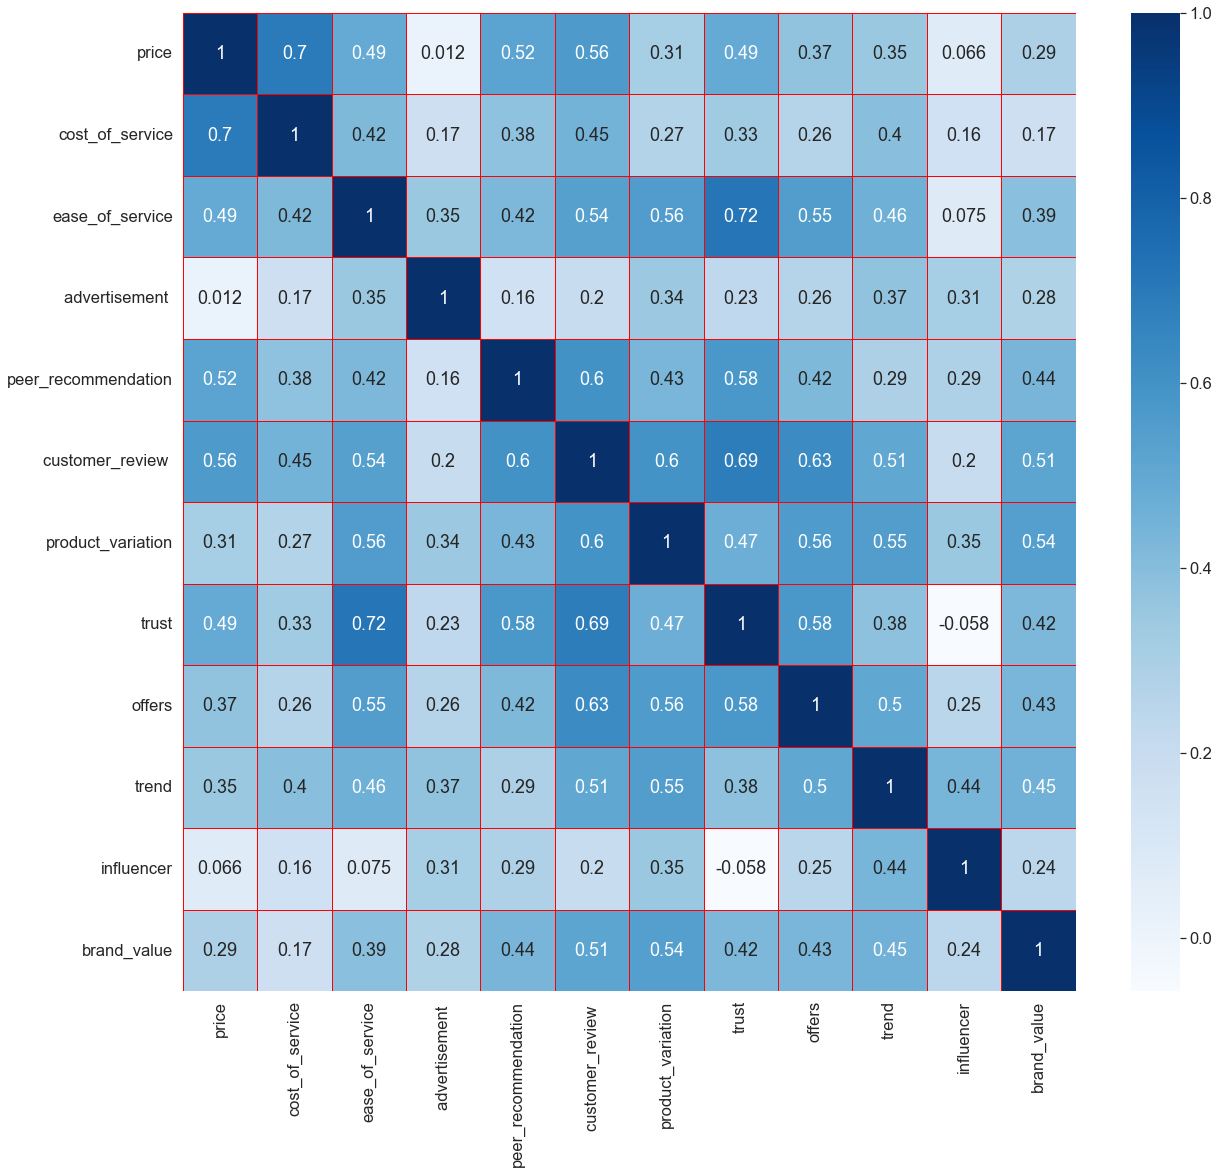

<Figure size 1440x1296 with 0 Axes>

In [12]:
#plotting the correlation coefficient in a heatmap

sns.set(style='whitegrid', palette='bright', font_scale=1.5, rc={'figure.figsize':(20,18)})
fig=sns.heatmap(df_population.corr(method='pearson'),annot=True,linewidths=1,linecolor='red',cmap='Blues')
fig1=plt.gcf()
plt.show()
plt.draw()
#fig1.savefig("pearson_correlation.png", dpi=300)

In [13]:
df_new=pd.read_excel('Data/case_study_data_01/data_correlation_modified.xlsx').drop(['Timestamp', 'email', 'social_media'], axis=1)
df_new.head()

,age_group,gender,living_area,purchase_frequency,preferred_platform,price,cost_of_service,ease_of_service,advertisement,peer_recommendation,customer_review,product_variation,trust,offers,trend,influencer,brand_value
0,24 - 28,Male,City,Occasionally,Facebook page,8,3,8,6,7,10,8,9,9,5,5,8
1,24 - 28,Male,Megalopolis,Twice to thrice per month,Facebook page,5,1,2,4,10,7,5,10,5,1,1,8
2,24 - 28,Male,Metropolis,Occasionally,Facebook page,5,6,6,5,5,5,6,6,5,5,6,6
3,18 - 23,Male,Metropolis,Occasionally,E-commerce website,8,8,9,8,9,8,8,8,8,8,8,8
4,18 - 23,Male,Town,Occasionally,E-commerce website,10,10,10,7,9,10,10,10,10,10,8,9


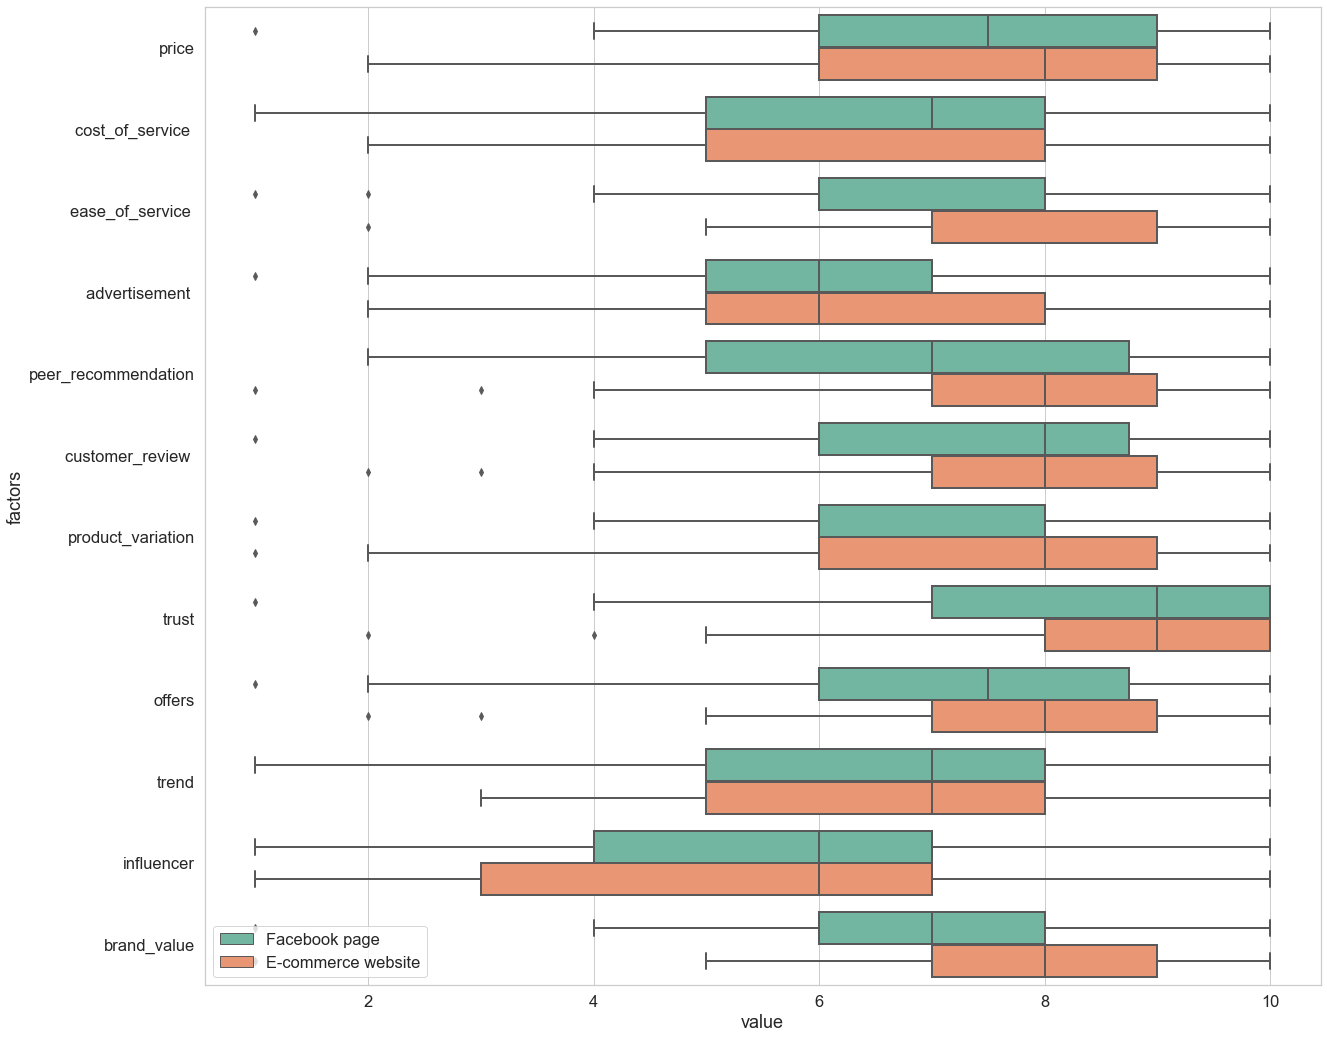

In [14]:
sns.set(style='whitegrid', palette='dark', font_scale=1.5, rc={'figure.figsize':(20,18)})
data = pd.melt(df_new.iloc[:,4:], 'preferred_platform', var_name = 'factors')
sns.boxplot(x = 'value', y = 'factors', hue='preferred_platform', data=data, linewidth=2, palette='Set2')
plt.legend(loc='lower left')
#plt.savefig("preferred_platform.png", dpi=300)

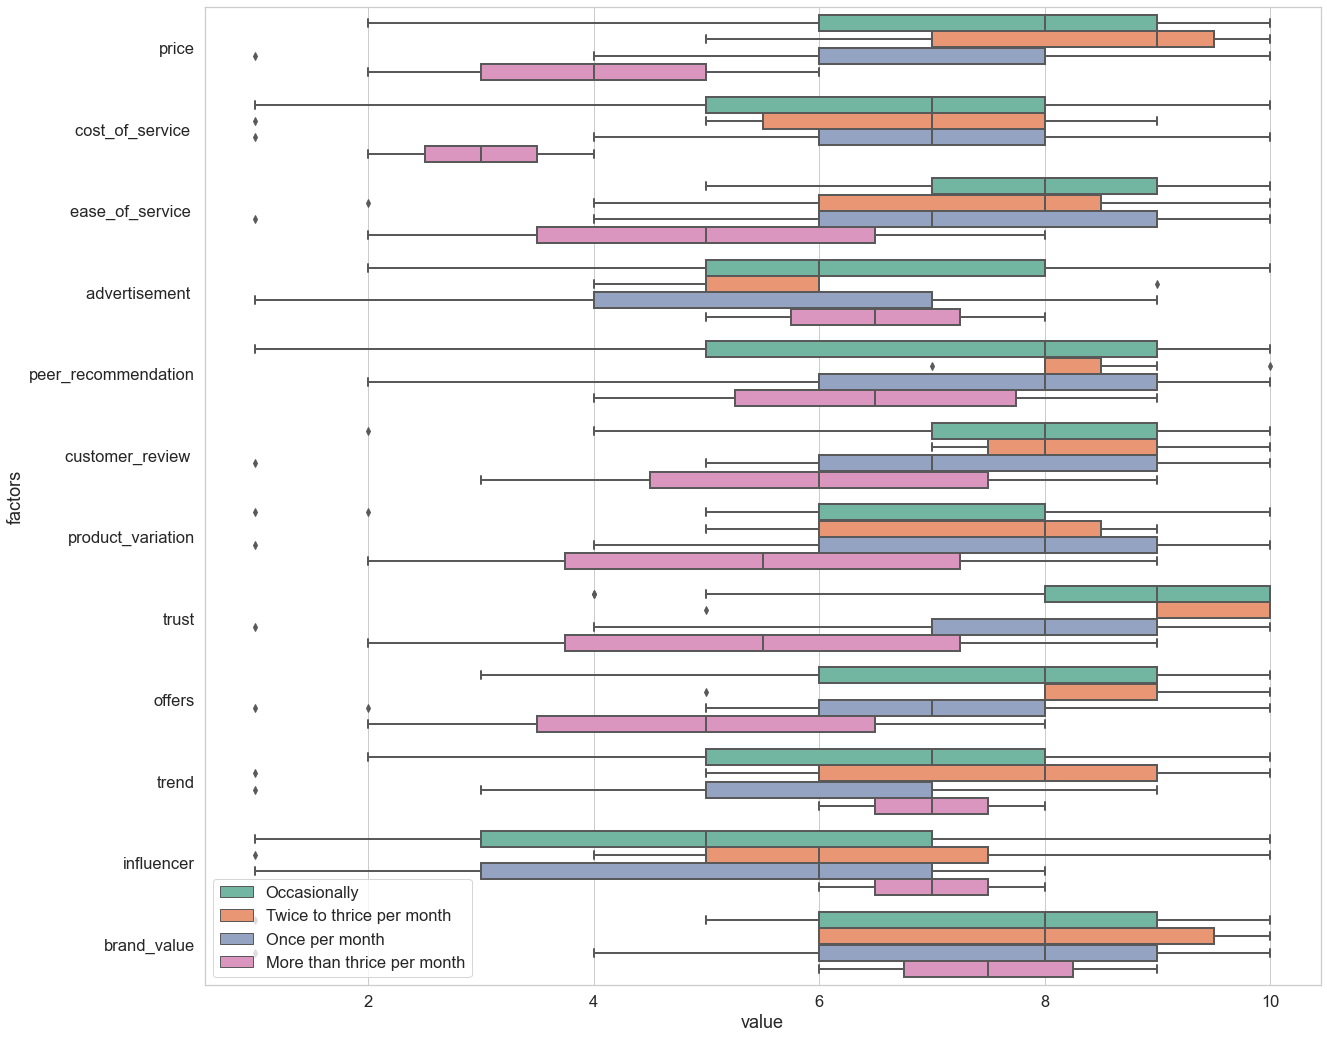

In [15]:
sns.set(style='whitegrid', palette='dark', font_scale=1.5, rc={'figure.figsize':(20,18)})
data = pd.melt(df_new.drop(['age_group','gender','living_area','preferred_platform'],axis=1), 'purchase_frequency', var_name = 'factors')
sns.boxplot(x = 'value', y = 'factors', hue='purchase_frequency', data=data, linewidth=2, palette='Set2')
plt.legend(loc='lower left')
#plt.savefig("purchase_frequency.png", dpi=300)

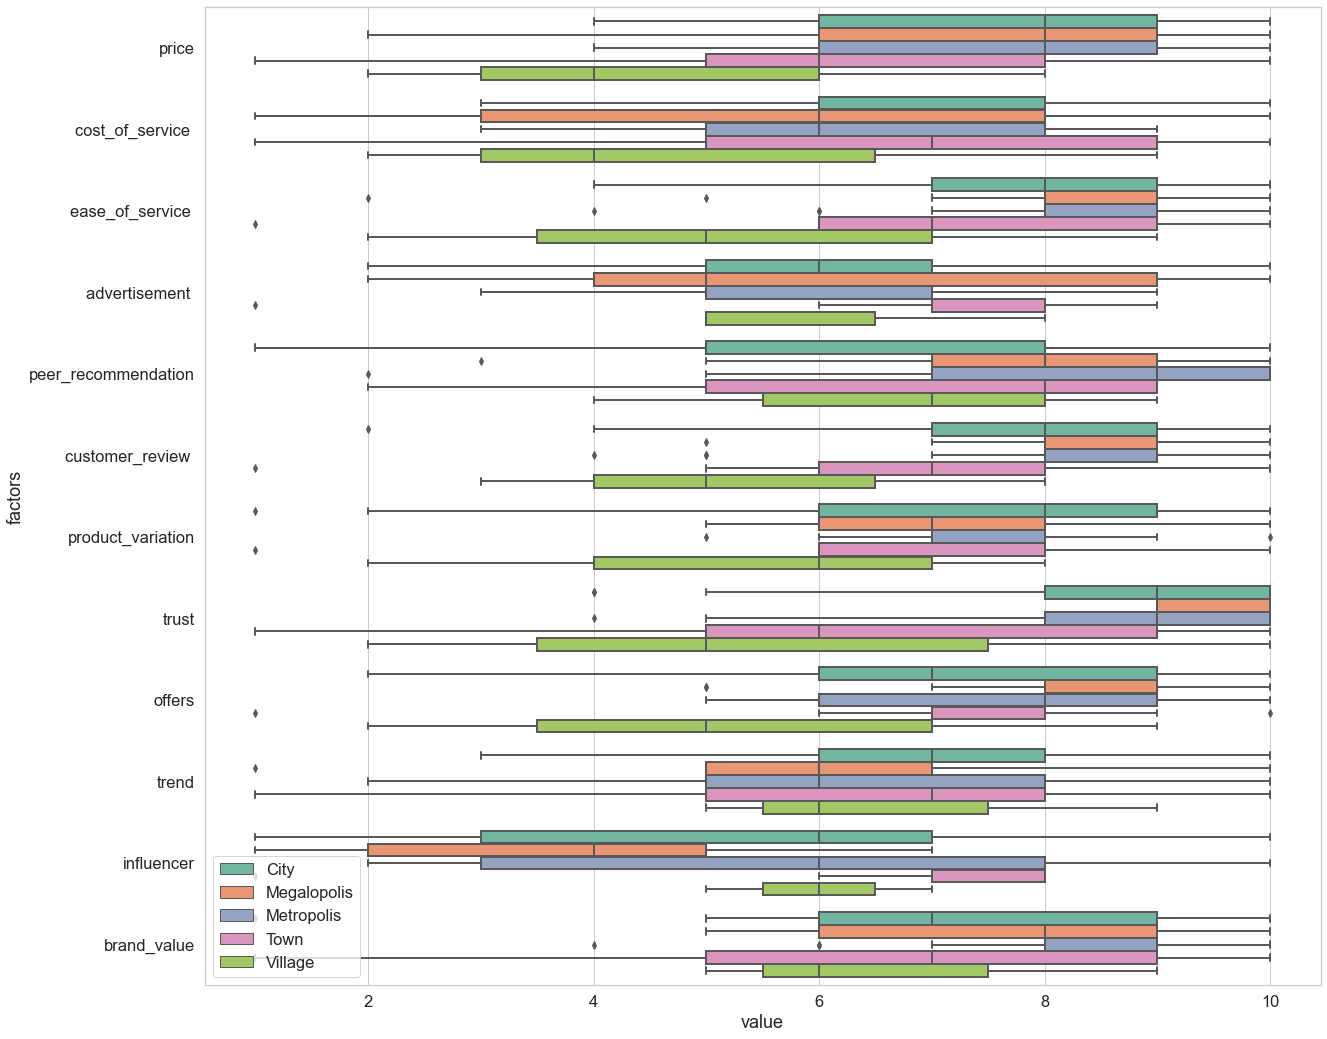

In [16]:
sns.set(style='whitegrid', palette='dark', font_scale=1.5, rc={'figure.figsize':(20,18)})
data = pd.melt(df_new.drop(['age_group','gender','purchase_frequency','preferred_platform'],axis=1), 'living_area', var_name = 'factors')
sns.boxplot(x = 'value', y = 'factors', hue='living_area', data=data, linewidth=2, palette='Set2')
plt.legend(loc='lower left')
#plt.savefig("living_area.png", dpi=300)

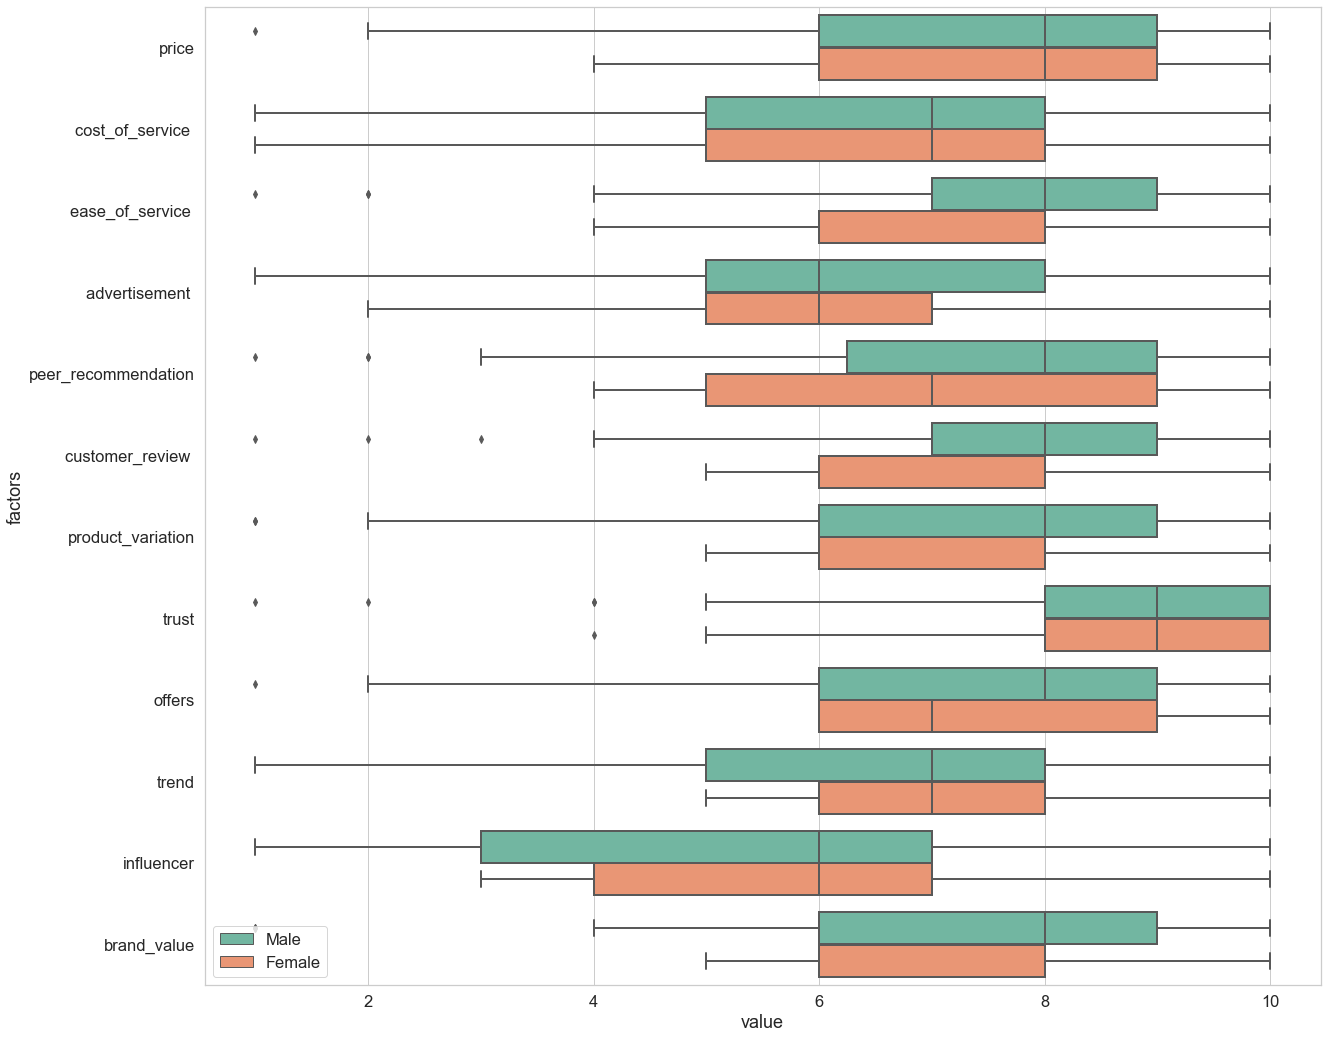

In [17]:
sns.set(style='whitegrid', palette='dark', font_scale=1.5, rc={'figure.figsize':(20,18)})
data = pd.melt(df_new.drop(['age_group','living_area','purchase_frequency','preferred_platform'],axis=1), 'gender', var_name = 'factors')
sns.boxplot(x = 'value', y = 'factors', hue='gender', data=data, linewidth=2, palette='Set2')
plt.legend(loc='lower left')
#plt.savefig("gender.png", dpi=300)

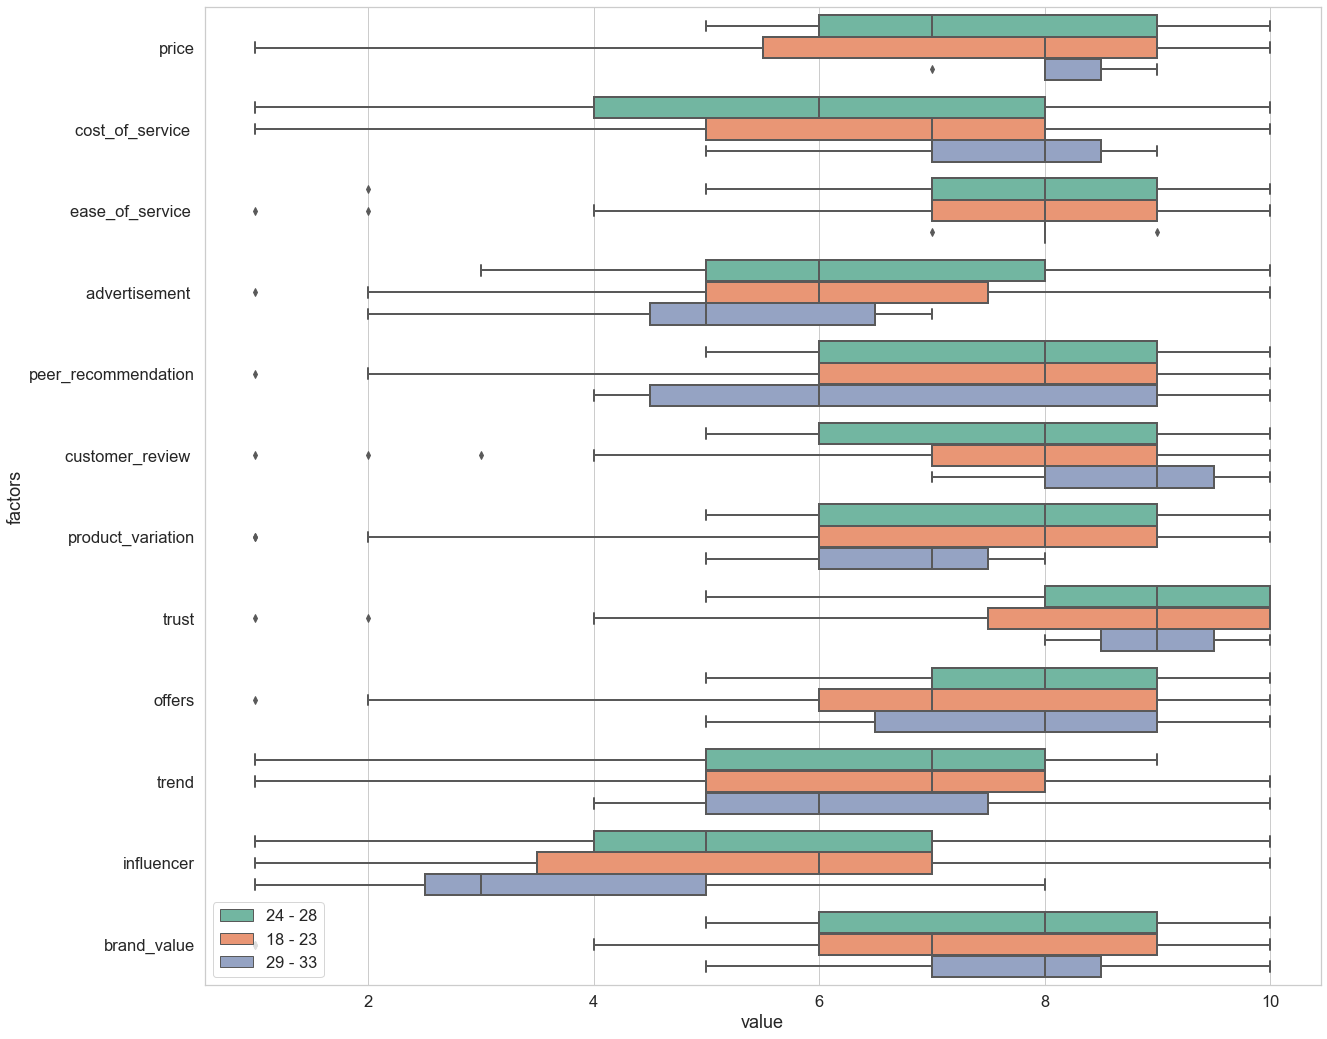

In [18]:
sns.set(style='whitegrid', palette='dark', font_scale=1.5, rc={'figure.figsize':(20,18)})
data = pd.melt(df_new.drop(['gender','living_area','purchase_frequency','preferred_platform'],axis=1), 'age_group', var_name = 'factors')
sns.boxplot(x = 'value', y = 'factors', hue='age_group', data=data, linewidth=2, palette='Set2')
plt.legend(loc='lower left')
#plt.savefig("age_group.png", dpi=300)

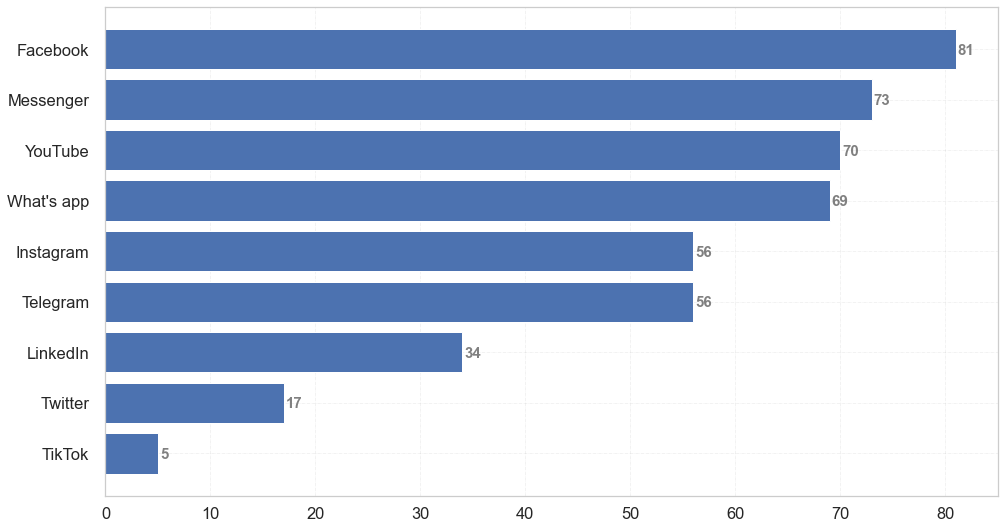

In [37]:
site = ["Facebook","Messenger","YouTube","What's app","Instagram","Telegram","LinkedIn","Twitter","TikTok"]
user = [81,73,70,69,56,56,34,17,5]

sns.set(style='whitegrid', palette='deep', font_scale=1.5)
fig, ax = plt.subplots(figsize =(16, 9))
ax.barh(site, user)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Add x, y gridlines
ax.grid(visible = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)

# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 15, fontweight ='bold',
             color ='grey')
plt.savefig("social media users.png", dpi=300)